### Watermelon Meow Meow setup

Differential equations, and more specifically compartmental models, are one way to study and describe disease dynamics among groups with heterogenous risk.
An alternative approach that can represent heterogenous risk among individuals or groups is network analysis.
In infectious diseases, the most frequent network we study is a contact network (defined below). 

We will use the **Watermelon Meow Meow Contact network** that was created at Lehigh University during the Spring 2023 semester in a course titled Outbreak sciennce and public health forecasting. 
This network was created as part of an extra credit assignement in the course.
You are welcome to use the WMM network that was created in this course or, if you prefer, there are two options for engaging in public health data collection. 
1. Create your own WMM network
2. Build upon the original WMM network. 

### 1. Create your own WMM network.

Below are the instructions to students to create a personal class WMM network. 

#### Instructions for students (and instructors) 
**Goal:** Your goal is to ask other students and professors if they would mind watching the video "Watermelon Meow Meow", a favorite song among many children.
The person that watches this video must approve having their institution username that is associated with their email address (for example the text XXX in the email address *XXX@institution.edu*) included on a google sheet for analysis in the class. No information related to the person will be used---only the username.

**Rules:** You cannot talk to one another about who you have "infected" with the watermelon meow meow pathogen.
An infection can occur only if you and the other person you infect is present in the same room (i.e. you cannot text this link to everyone on campus. This does not count as an effective contact).
If the individual who watches the video does not allow you to include their username in the google sheet then this is not an infection. 
If you enter the data into the sheet incorrectly then this is not an infection. 

**Link to Watermelon Meow Meow Video**: https://youtu.be/ZSRfbByt4uk

**Data entry:** The google sheet to enter infectious contact data is here <include link for your course>. The google sheet has three columns. The names of the columns are bolded and are followed by descriptions: (i) **infector**, this is the person that has infected another with the watermelon meow meow pathogen, (ii) **infected**, this is the person who was susceptible to WMM and has now become infected by the infector, (iii) **special interest**, this third column is to denote an infected/infector of special interest. 
    
**Data de-identification**
Usernames of students in the google sheet can be de-identified with the code that is saved in "de_identify.ipynb".
This code should be copy and pasted into a python script titled "de_identify.py" and placed in a folder that contains your WMM dataset which is titled "Watermelon_meow_meow.csv". This code will output a de-identified file called "Watermelon_meow_meow__DEIDENTIFIED.csv" that you can share with your class for analysis. 

### 2. Build upon the original WMM network for instructors). 
If you wish to add on to the original WMM network (or to a previous network that is already an add-on to the WMM network) then you can apply the code titled "add_on_to_WMM.ipynb". 
This code takes as input a csv file that is created in the same format as the original WMM network.


**Goals:**

Our goals will be to
- Visualize the contact pattern of the Watermelon Meow Meow network
- Characterize the *degree* distribution of this network. 
- Simulate an outbreak on this network

### Defining a network

Our first goal is to understand how to represent mathematically a **contact network**---a network that describes individuals and the connections that they have made with one another. 

A **network** or graph is a tuple $G = (N,E)$ that contains a set of nodes
$$
\begin{align}
    N = \{n_{1},n_{2},n_{3}\cdots,n_{N}\}
\end{align}
$$
and a set of pairs where both items in each pair must come from the set of nodes. 
These pairs are called edges and can be represented by a network's edge set:
$$
\begin{align}
    E = \{  (n_{i}, n_{j} ) \; | \;  \text{for some node i and some node j} )  \}
\end{align}
$$
For example, we might consider a graph $G = (N,E)$ where 
$N = \{a,b,c,d,e\}$ and $E = \{ (a,b),(c,d),(a,e),(a,c) \}$
This graph has five nodes and four edges: an edge from node a to node b, edge from node c to node d, edge from node a to node e, and an edge from node a to node c. 

We can visualize a network (graph) by letting circles represent nodes and for each edge $(x,y)$ drawing a line between node $x$ and node $y$.
The `networkx` package is a handy tool for operating and visualizing networks. 
Lets implement the above network and visualize it. 

### The degree distribution as one way to characterize a network 

There are many different ways that we can characterize a network, but one of the most frequent ways is to describe a network's **degree distribution**.
The **degree** of a node $x$, $deg(x)$, is the number of edges that contain the node $x$. 
$$
\begin{align}
    deg(x) = | \{ (a,b) \in E \; | \; a=x \text{ or } b=x \} |
\end{align}
$$
where the symbol $| \cdot |$ returns the number of items in a set. 
Lets look at our above example and describe the degree of each node. 

Because the node $a$ has three edges it has degree 3, $deg(a)=3$. 
Those edges are $\{ (a,b), (a,c), (a,e) \}$.
The nodes that are connected to the node $a$ are called **neighbors**. 
The neighbors of $a$ are the nodes: $b$,$c$,$e$.

Though the degree is a property that is specific to a single node, the **degree distribution** is a property of an entire network and quanifies the probability that we select a node that has degree $k$.
Lets compute the degree distribution for our example. 

The total number of edges is 4. 
The degree for each node is 
$$
\begin{align}
    deg(a) = 3\\
    deg(b) = 1\\
    deg(c) = 2\\
    deg(d) = 1\\
    deg(e) = 1
\end{align}
$$
Let the random variable $K$ represent selecting a node with a specific degree. 

The probability of selecting a node at random with degree one can be estimated as $P( K=1 ) = 3/5$. 

The probability of selecting a node at random with degree 2 can be estimated as $P( K=2 ) = 1/5$. 

The probability of selecting a node at random with degree 3 can be estimated as $P( K=3 ) = 1/5$. 

### Watermelon Meow Meow

Lets apply the concepts of network visualization and degree distribution to summarize the Watermelon Meow Meow contact network that was built in the beginning of this course. 
You can download the network here = []().
Store this CSV in the same folder where your Jupyter notebook is. 

Lets first import this CSV file as a dataframe using `pandas`.

The Watermelon Meow Meow dataset contains three columns.
The first column describes an infector, a person who has an infection and passes it to someone who then becomes infected which is the second column.
The third column describes whether one of the infected individuals was a Dean, Provost, or the President of our university.

In [2]:
import pandas as pd 
WMMM = pd.read_csv("../wmm_networks/mcandrew_watermelon_meow_meow__2023S__DEIDENTIFIED.csv")
WMMM

,infected,infector
0,627,282
1,464,282
2,956,294
3,962,294
4,121,294
...,...,...
328,68,942
329,976,942
330,153,942
331,376,942


We can create an empty network using networkx and assign an edge between every infector and infected in our `WMMM` dataframe. 
We can iterate through the rows of the WMMM dataframe using the `iterrows()` method [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iterrows.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iterrows.html). 
We will add an edge to our network using the `add_edge` method in networkx. 

In [7]:
#--import networkx
import networkx as nx 

#--create an empty graph
g = nx.Graph()

#--loops through every edge in the WMM dataframe
#--add an edge for every (infector, infected) pair. 
for index,row in WMMM.iterrows():
    g.add_edge( row.infector, row.infected )

Now we can visualize the **Watermelon Meow Meow Network**. 

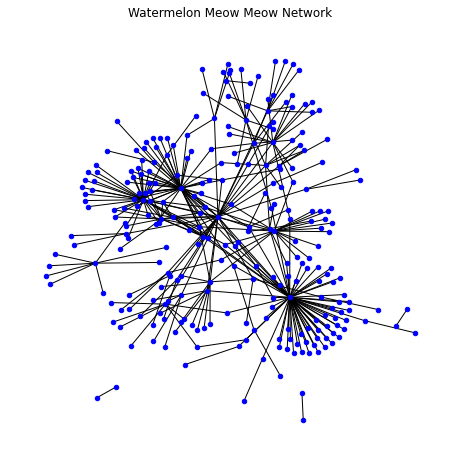

In [8]:
#--presents i found from the internet (not kidding)
pos = nx.spring_layout(g, scale=20, k=3/np.sqrt(g.order()))
d = dict(g.degree)

#--set up a plot
fig,ax = plt.subplots()

nx.draw(g
        ,pos
        ,with_labels=False 
        ,nodelist=g
        ,node_color="blue"
        ,node_size=20
       ,ax=ax)
fig.set_size_inches(8,8)
plt.title("Watermelon Meow Meow Network")
plt.show()

The **Watermelon Meow Meow** network that was created by our class has some striking characteristics. 
Likely, the most salient characteristic is that there are a small numner of infectors with a large degree (a large number of people who they infected) and many of the infectors had a small degree (small number of people who were infected). 
This type of network is typical of a **social network**.
A social network is a network where the nodes are human or some representation of a human (online account) and where the edges are contacts between humans. 
In an online network you might draw an edge between two accounts that have interacted. 

Our network contains humans as nodes and assigns an edge between two humans because they have made an **effective contact**, a contact that results in transmission of the Watermelon Meow Meow disease.

We can characterize this WMM network by its degree distribution. 
The ``networkx`` package has a handy method called `degree` that returns the degree of each node in the network. 
Rather than plot the probability of each individual degree, lets compute the probability a node has at least degree $k$, or 

\begin{align}
    P(K \geq k) = 1 - P(K < k) = 1 - F(k)
\end{align}

This distribution is often called a **complementary cumulative distribution** (ccdf). 
Dont worry about the function that i have implemented below to generate the ccdf. 

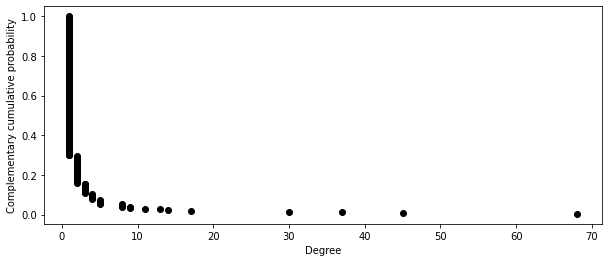

In [9]:
#--create a figure
fig,ax = plt.subplots()

#--collect the degrees of each node in a list
degrees = list(dict(g.degree()).values())

#--function to compute complementary cumulative density
def ccdf(x):
    L = 1.*len(x)
    x, px = sorted(x), 1. - np.arange(0,L)/L
    return x,px #--returns k and P(K>=k)

x,px = ccdf(degrees)
ax.plot(x,px,'ko')
ax.set_xlabel("Degree")
ax.set_ylabel("Complementary cumulative probability")

fig.set_size_inches(10,4)

It looks like many nodes have a degree of at least one but only a small number have degree greater than ten, and an even smaller number of nodes have a degree greater than 40. 
Let's try to better visualize this graph by taking the log of the horizontal and vertical axis.

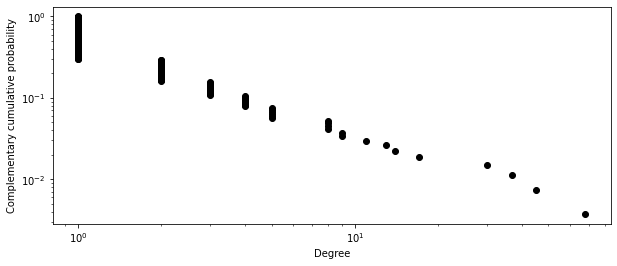

In [10]:
#--create a figure
fig,ax = plt.subplots()

#--collect the degrees of each node in a list
degrees = list(dict(g.degree()).values())

#--function to compute complementary cumulative density
def ccdf(x):
    L = 1.*len(x)
    x, px = sorted(x), 1. - np.arange(0,L)/L
    return x,px #--returns k and P(K>=k)

x,px = ccdf(degrees)
ax.loglog(x,px,'ko') #--take the log of the horizontal and vertical axis
ax.set_xlabel("Degree")
ax.set_ylabel("Complementary cumulative probability")

fig.set_size_inches(10,4)

The above degree distribution is typical of **social network**.
Many nodes in a social network have a small number of connections while a small number of nodes have a large number of connections. 
We can see that our Watermelon Meow Meow network exhibits this property of a social network. 